In [7]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models,regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import json

In [2]:
datset_path = "C:/Users/Hp/Desktop/Classes/CNN_classification/DataSet"

train_data_path = os.path.join(datset_path,'training')
test_data_path = os.path.join(datset_path,'test')

## Processing Training data


In [3]:
class_labels=[]
features=[]
WIDTH=HEIGHT=64

for file in os.listdir(train_data_path):
    img_path=os.path.join(train_data_path,file)
    current_label=file
    for img in os.listdir(img_path):
        image = plt.imread(os.path.join(img_path,img))
        class_labels.append(current_label)
        img = image.reshape([WIDTH, HEIGHT, 3])
        features.append(img)

In [4]:
x_train=np.array(features)
targetNames=np.unique(class_labels)
le=LabelEncoder()
y_train=le.fit_transform(class_labels)

In [5]:
print("Shape of x_train: ",np.shape(x_train))
print("Shape of y_train: ",np.shape(y_train))

Shape of x_train:  (5875, 64, 64, 3)
Shape of y_train:  (5875,)


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [13]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [14]:
print("Shape of x_train: ",np.shape(X_train))
print("Shape of y_train: ",np.shape(Y_train))


print("Shape of X_test: ",np.shape(X_test))
print("Shape of y_test: ",np.shape(Y_test))

Shape of x_train:  (4112, 64, 64, 3)
Shape of y_train:  (4112,)
Shape of X_test:  (1763, 64, 64, 3)
Shape of y_test:  (1763,)


## Training the model

### CNN-NN

In [27]:
model1 = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1,activation = "sigmoid")
])

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
history=cnn.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=10)

### CNN-SVM

In [9]:
model2 = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1,kernel_regularizer=regularizers.l2(0.01),activation = "linear")
])

In [21]:
model2.compile(optimizer='adam',loss='hinge', metrics=['accuracy'])
history=cnn.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=30)

Epoch 1/30
129/129 [==============================] - 7s 53ms/step - loss: 0.1244 - accuracy: 0.9499 - val_loss: 0.1539 - val_accuracy: 0.9387
Epoch 2/30
129/129 [==============================] - 9s 71ms/step - loss: 0.1252 - accuracy: 0.9484 - val_loss: 0.1322 - val_accuracy: 0.9484
Epoch 3/30
129/129 [==============================] - 9s 66ms/step - loss: 0.1024 - accuracy: 0.9553 - val_loss: 0.1232 - val_accuracy: 0.9484
Epoch 4/30
129/129 [==============================] - 8s 64ms/step - loss: 0.1271 - accuracy: 0.9472 - val_loss: 0.1381 - val_accuracy: 0.9438
Epoch 5/30
129/129 [==============================] - 9s 69ms/step - loss: 0.1119 - accuracy: 0.9521 - val_loss: 0.1113 - val_accuracy: 0.9501
Epoch 6/30
129/129 [==============================] - 7s 50ms/step - loss: 0.0837 - accuracy: 0.9621 - val_loss: 0.3157 - val_accuracy: 0.9280
Epoch 7/30
129/129 [==============================] - 8s 58ms/step - loss: 0.1111 - accuracy: 0.9545 - val_loss: 0.3380 - val_accuracy: 0.9058

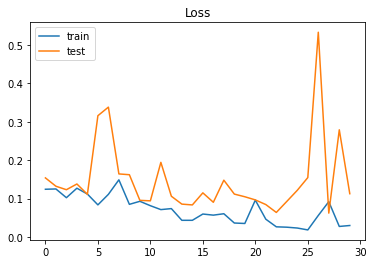

In [22]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()          

In [23]:
test_images = []

for img in os.listdir(test_data_path):
    test_image = plt.imread(os.path.join(test_data_path,img))
    test_images.append(test_image.reshape([WIDTH, HEIGHT, 3]))
test_images = np.array(test_images)

In [24]:
final_preds=[]
model_predictions = model1.predict(test_images)

for i in model_predictions:
    if(i >= 1):
        final_preds.append(1)
    else:
        final_preds.append(0)


## Model accuracy

In [25]:
def model_accuracy(final_preds):
    manual_preds=[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,
                 1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0]
    return sum(1 for x,y in zip(manual_preds,final_preds) if x == y) / float(len(final_preds))

In [28]:
model_accuracy(final_preds) 

0.5918367346938775

## Results to Json file

In [31]:
dictio={}
for i,j in enumerate(os.listdir(test_data_path)):
    dictio[j] = final_preds[i]

In [32]:
def write_json(filename, result):
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)

def generate_sample_file(filename):
    write_json(filename, dictio)


generate_sample_file('./result.json')